In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df = df.drop(columns=['sepal_width' , 'petal_width'])

In [9]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [10]:
X= df.iloc[:,:-1]

In [12]:
y= df.iloc[:,-1]

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,
                                                      test_size=0.2,
                                                      random_state=42)

In [21]:
clf = LogisticRegression(multi_class='multinomial')

In [22]:
clf.fit(X_train, y_train)

C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [23]:
y_pred = clf.predict(X_test)

In [26]:
pd.DataFrame(confusion_matrix(y_test ,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [25]:
accuracy_score(y_test,y_pred)

1.0

In [27]:
from mlxtend.plotting import plot_decision_regions

C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


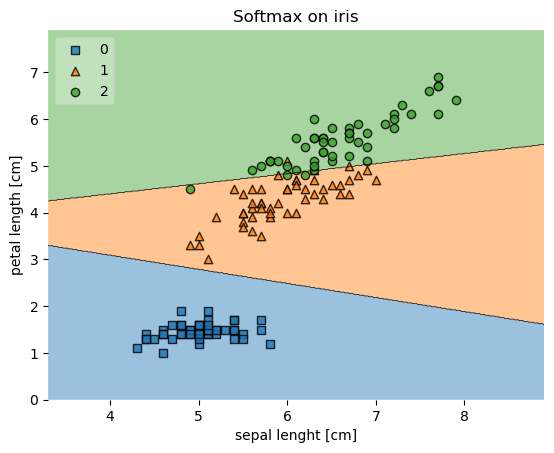

In [28]:
plot_decision_regions(X.values , y.values , clf , legend=2)

#adding axes annotation
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on iris')

plt.show()